In [41]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
from ripser import ripser
from persim import plot_diagrams


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # otherwise, get latex error when visualizing plots

# Create a more complicated stimulus space

In [2]:
def remove_ellipse(PC, x0, y0, a, b, r):
    # given PC, remove points in the ellipse ((x-x0)/a)^2 + ((y-y0)/b)^2 <= r^2
    n = PC.shape[0]

    # index of points to remove
    remove_idx = []
    for i in range(n):
        x = PC[i,0]
        y = PC[i,1]

        if ((x - x0)/a)**2 + ((y-y0)/b)**2 <= r**2:
            remove_idx.append(i)

    return np.delete(PC, remove_idx, 0)


In [83]:
n_PC1 = 800
PC1 = np.random.rand(n_PC1,2)

# punch one large ellipse centered at (0.2, 0.4).  
PC1 = remove_ellipse(PC1, 0.2, 0.4, 0.9, 1.4, 0.1)


# punch one large ellipse centered at (0.8, 0.8) that covers 3 ellipses in PC1
PC1 = remove_ellipse(PC1, 0.75, 0.6, 1, 1.2, 0.2)

# punch one large ellipse that doesn't exist in PC1
PC1 = remove_ellipse(PC1, 0.2, 0.8, 1, 0.9, 0.1)


print("number of points in PC1: ", PC1.shape[0])


number of points in PC1:  625


In [86]:
n_PC2 = 1500
PC2 = np.random.rand(n_PC2,2)

# punch one large ellipse centered at (0.2, 0.4)
PC2 = remove_ellipse(PC2, 0.2, 0.4, 0.9, 1.4, 0.15)

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.6, 0.6, 0.4, 0.4, 0.18)

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.8, 0.4, 0.7, 0.4, 0.15)

# punch three discs near each other
PC2 = remove_ellipse(PC2, 0.85, 0.7, 0.3, 0.7, 0.15)


print("number of points in PC2: ", PC2.shape[0])


number of points in PC2:  1290


In [87]:
n_PC1 = PC1.shape[0]
n_PC2 = PC2.shape[0]

fig = go.Figure(data = [go.Scatter3d(x = PC1[:,0], y = PC1[:,1], z = [0.5] * n_PC1,  
                                    mode='markers',
                                    marker=dict( size=2, color = "#00b4bc")
                                    )])

fig.add_trace(go.Scatter3d(x = PC2[:,0], 
                            y = PC2[:,1], 
                            z = [0]* n_PC2,
                            mode='markers',
                            marker = dict(size = 2, color = "#ee9c33") )        
            )


fig.show()

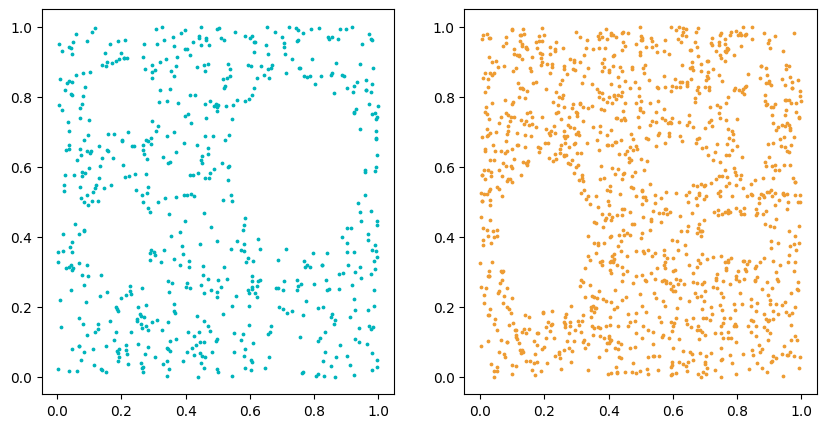

In [88]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
ax[0].scatter(PC1[:,0], PC1[:,1], color = "#00b4bc", s = 3)
ax[1].scatter(PC2[:,0], PC2[:,1], color = "#ee9c33", s = 3)
plt.show()

# Make both point clouds to live on a curvy surface

In [89]:
PC1_z = (np.cos(PC1[:,0] * 2 * math.pi ) * np.cos(PC1[:,1] * 2 * math.pi) * 0.05) + 0.2
PC1_z = PC1_z.reshape(-1, 1)
PC1_3d = np.concatenate((PC1, PC1_z), axis = 1)

PC2_z = np.cos(PC2[:,0] * math.pi) * np.sin(PC2[:,1] * 2 * math.pi) * 0.1
PC2_z = PC2_z.reshape(-1,1)
PC2_3d = np.concatenate((PC2, PC2_z), axis = 1)


In [90]:
n_PC1 = PC1.shape[0]
n_PC2 = PC2.shape[0]


fig = go.Figure(data = [go.Scatter3d(x = PC1_3d[:,0], y = PC1_3d[:,1], z = PC1_3d[:,2],  
                                    mode='markers',
                                    marker=dict( size=2,color = "#00b4bc")
                                    )])

fig.add_trace(go.Scatter3d(x = PC2_3d[:,0], 
                            y = PC2_3d[:,1], 
                            z = PC2_3d[:,2],
                            mode='markers',
                            marker = dict(size = 2, color = "#ee9c33") )        
            )


fig.show()

## Check PH

In [91]:
persistence1 = ripser(PC1_3d,
                    maxdim=1,
                    coeff=47,
                    do_cocycles=True,
                    )

In [92]:
persistence2 = ripser(PC2_3d,
                    maxdim=1,
                    coeff=47,
                    do_cocycles=True,
                    )

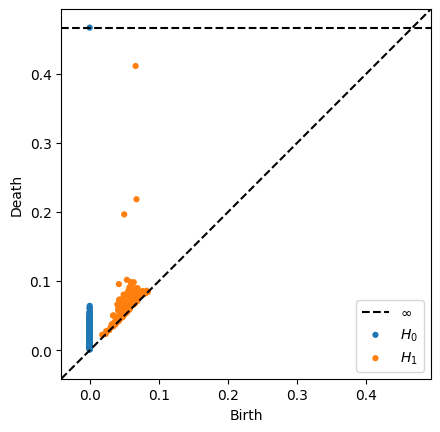

In [93]:
plt.figure()
plot_diagrams(persistence1["dgms"])
plt.show()

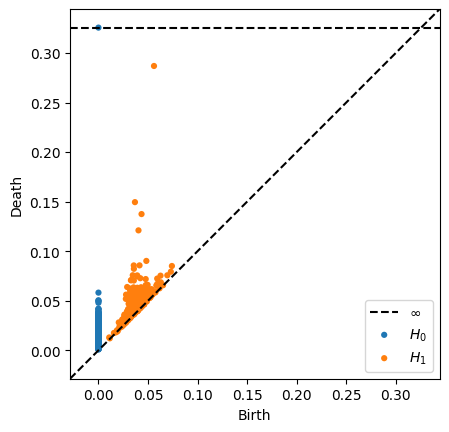

In [94]:
plt.figure()
plot_diagrams(persistence2["dgms"])
plt.show()

In [95]:
# save PC1, PC2
np.savetxt("pointcloud1.csv", PC1_3d, delimiter = ",")
np.savetxt("pointcloud2.csv", PC2_3d, delimiter = ",")